In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as lm
from sklearn.ensemble import GradientBoostingRegressor as gb
from sklearn.ensemble import RandomForestRegressor as rf
import datetime as dt
from sklearn.metrics import mean_absolute_error
import xgboost as xgb



In [3]:
df= pd.read_csv("train_fwYjLYX.csv")

In [4]:
df.head()

,application_date,segment,branch_id,state,zone,case_count
0,2017-04-01,1,1.0,WEST BENGAL,EAST,40.0
1,2017-04-03,1,1.0,WEST BENGAL,EAST,5.0
2,2017-04-04,1,1.0,WEST BENGAL,EAST,4.0
3,2017-04-05,1,1.0,WEST BENGAL,EAST,113.0
4,2017-04-07,1,1.0,WEST BENGAL,EAST,76.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80402 entries, 0 to 80401
Data columns (total 6 columns):
application_date    80402 non-null object
segment             80402 non-null int64
branch_id           66898 non-null float64
state               80402 non-null object
zone                66898 non-null object
case_count          80402 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 3.7+ MB


In [6]:
df.describe()

,segment,branch_id,case_count
count,80402.000000,66898.000000,80402.000000
mean,1.167956,118.831325,185.481841
std,0.373830,94.285434,749.602925
min,1.000000,1.000000,0.000000
25%,1.000000,36.000000,0.000000
50%,1.000000,82.000000,18.000000
75%,1.000000,248.000000,60.000000
max,2.000000,271.000000,13787.000000


In [7]:
df.dtypes

application_date     object
segment               int64
branch_id           float64
state                object
zone                 object
case_count          float64
dtype: object

In [8]:
df.shape

(80402, 6)

In [9]:
df

,application_date,segment,branch_id,state,zone,case_count
0,2017-04-01,1,1.0,WEST BENGAL,EAST,40.0
1,2017-04-03,1,1.0,WEST BENGAL,EAST,5.0
2,2017-04-04,1,1.0,WEST BENGAL,EAST,4.0
3,2017-04-05,1,1.0,WEST BENGAL,EAST,113.0
4,2017-04-07,1,1.0,WEST BENGAL,EAST,76.0
...,...,...,...,...,...,...
80397,2019-07-19,2,NaN,WEST BENGAL,NaN,1886.0
80398,2019-07-20,2,NaN,WEST BENGAL,NaN,1480.0
80399,2019-07-21,2,NaN,WEST BENGAL,NaN,1028.0
80400,2019-07-22,2,NaN,WEST BENGAL,NaN,1946.0


In [10]:
 df.describe(include='object')

,application_date,state,zone
count,80402,80402,66898
unique,844,20,5
top,2017-06-03,MAHARASHTRA,EAST
freq,99,11322,21762


In [11]:
df['application_date'].min()

'2017-04-01'

In [12]:
df['application_date'].max()

'2019-07-23'

In [13]:
df.isnull().sum()

application_date        0
segment                 0
branch_id           13504
state                   0
zone                13504
case_count              0
dtype: int64

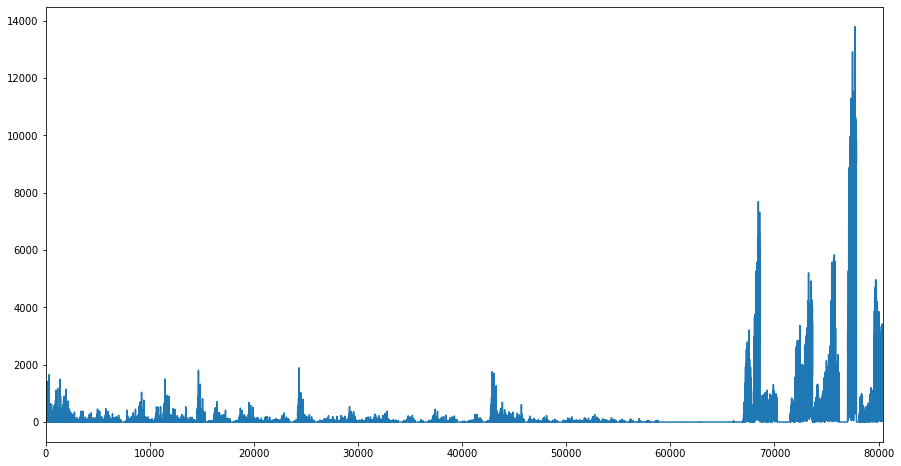

In [14]:
data =pd.Series(df['case_count'])
plt.figure(figsize = (15,8))
data.plot()


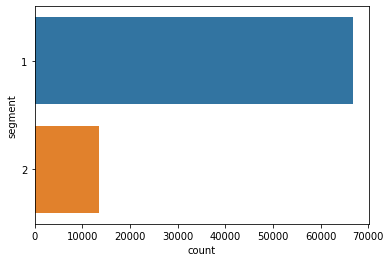

In [15]:
sns.countplot(y='segment', data = df)
plt.show()


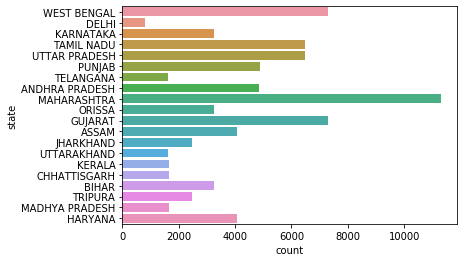

In [16]:
sns.countplot(y='state', data = df)
plt.show()


In [17]:
df.state.nunique()

20

In [18]:
df.zone.nunique()

5

In [19]:
df.zone.unique()

array(['EAST', 'NORTH', 'SOUTH', 'WEST', 'CENTRAL', nan], dtype=object)

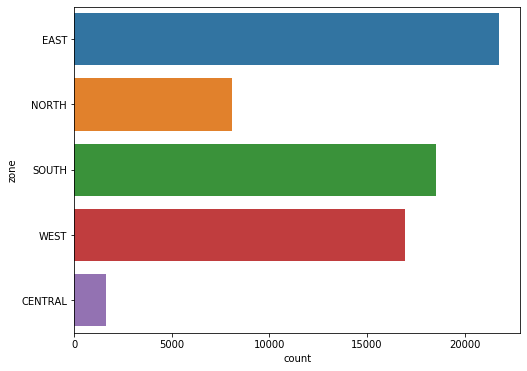

In [20]:
zones = df.loc[df.zone != np.nan]
plt.figure(figsize=(8,6))
sns.countplot(y='zone', data= zones)
plt.show()


In [21]:
df.head()

,application_date,segment,branch_id,state,zone,case_count
0,2017-04-01,1,1.0,WEST BENGAL,EAST,40.0
1,2017-04-03,1,1.0,WEST BENGAL,EAST,5.0
2,2017-04-04,1,1.0,WEST BENGAL,EAST,4.0
3,2017-04-05,1,1.0,WEST BENGAL,EAST,113.0
4,2017-04-07,1,1.0,WEST BENGAL,EAST,76.0


In [22]:
# plt.figure(figsize=(12,6))
# sns.boxplot('case_count', data = df)
# plt.show()

In [23]:
# num_vars = ['segment','branch_id','case_count']
# from pandas.plotting import scatter_matrix
# scatter_matrix(df[num_vars],figsize=(10,8))
# plt.show()


In [24]:
# sns.heatmap(df.corr(), annot=True)
# plt.show()


In [25]:
df_feat = df.copy()

In [26]:
df_feat.head()

,application_date,segment,branch_id,state,zone,case_count
0,2017-04-01,1,1.0,WEST BENGAL,EAST,40.0
1,2017-04-03,1,1.0,WEST BENGAL,EAST,5.0
2,2017-04-04,1,1.0,WEST BENGAL,EAST,4.0
3,2017-04-05,1,1.0,WEST BENGAL,EAST,113.0
4,2017-04-07,1,1.0,WEST BENGAL,EAST,76.0


In [27]:
df_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80402 entries, 0 to 80401
Data columns (total 6 columns):
application_date    80402 non-null object
segment             80402 non-null int64
branch_id           66898 non-null float64
state               80402 non-null object
zone                66898 non-null object
case_count          80402 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 3.7+ MB


In [28]:
df_feat['application_date'] = pd.to_datetime(df_feat.application_date)

In [29]:
df_feat.head()

,application_date,segment,branch_id,state,zone,case_count
0,2017-04-01,1,1.0,WEST BENGAL,EAST,40.0
1,2017-04-03,1,1.0,WEST BENGAL,EAST,5.0
2,2017-04-04,1,1.0,WEST BENGAL,EAST,4.0
3,2017-04-05,1,1.0,WEST BENGAL,EAST,113.0
4,2017-04-07,1,1.0,WEST BENGAL,EAST,76.0


In [30]:
df_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80402 entries, 0 to 80401
Data columns (total 6 columns):
application_date    80402 non-null datetime64[ns]
segment             80402 non-null int64
branch_id           66898 non-null float64
state               80402 non-null object
zone                66898 non-null object
case_count          80402 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 3.7+ MB


In [31]:
df_feat['month'] = df_feat.application_date.dt.month
df_feat['year'] = df_feat.application_date.dt.year
df_feat['day'] = df_feat.application_date.dt.day

In [32]:
df_feat.head()

,application_date,segment,branch_id,state,zone,case_count,month,year,day
0,2017-04-01,1,1.0,WEST BENGAL,EAST,40.0,4,2017,1
1,2017-04-03,1,1.0,WEST BENGAL,EAST,5.0,4,2017,3
2,2017-04-04,1,1.0,WEST BENGAL,EAST,4.0,4,2017,4
3,2017-04-05,1,1.0,WEST BENGAL,EAST,113.0,4,2017,5
4,2017-04-07,1,1.0,WEST BENGAL,EAST,76.0,4,2017,7


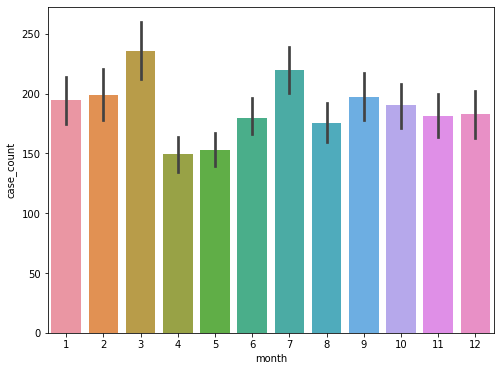

In [33]:
plt.figure(figsize=(8,6))
sns.barplot(x='month', y='case_count', data = df_feat)
plt.show()


In [34]:
def Month_modify(x):
    Winters = [1,2,3]
    Summers = [4,5,6]
    Rainy = [7,8,9]
    Post_monsoon=[10,11,12] 
    if x in Winters:
        return 'Winters'
    elif x in Summers:
        return 'Summers'
    elif x in Rainy:
        return 'Rainy'
    else:
        return 'Post_monsoon'
    

In [35]:
df_feat['month'] = df_feat.month.map(Month_modify)

In [36]:
df_feat.head()

,application_date,segment,branch_id,state,zone,case_count,month,year,day
0,2017-04-01,1,1.0,WEST BENGAL,EAST,40.0,Summers,2017,1
1,2017-04-03,1,1.0,WEST BENGAL,EAST,5.0,Summers,2017,3
2,2017-04-04,1,1.0,WEST BENGAL,EAST,4.0,Summers,2017,4
3,2017-04-05,1,1.0,WEST BENGAL,EAST,113.0,Summers,2017,5
4,2017-04-07,1,1.0,WEST BENGAL,EAST,76.0,Summers,2017,7


In [37]:

# df_year = df_feat.groupby('year').aggregate({'case_count':'mean'})
# plt.figure(figsize=(12,8))
# sns.lineplot(x = df.index, y = df.case_count, data = df)
# plt.show()


In [38]:
# df_seg = df_feat.groupby('segment').aggregate({'case_count':'mean'})
# plt.figure(figsize=(12,8))
# sns.lineplot(x = df.index, y = df.case_count, data = df)
# plt.show()

In [39]:
df.head()

,application_date,segment,branch_id,state,zone,case_count
0,2017-04-01,1,1.0,WEST BENGAL,EAST,40.0
1,2017-04-03,1,1.0,WEST BENGAL,EAST,5.0
2,2017-04-04,1,1.0,WEST BENGAL,EAST,4.0
3,2017-04-05,1,1.0,WEST BENGAL,EAST,113.0
4,2017-04-07,1,1.0,WEST BENGAL,EAST,76.0


In [40]:
df_feat.head()

,application_date,segment,branch_id,state,zone,case_count,month,year,day
0,2017-04-01,1,1.0,WEST BENGAL,EAST,40.0,Summers,2017,1
1,2017-04-03,1,1.0,WEST BENGAL,EAST,5.0,Summers,2017,3
2,2017-04-04,1,1.0,WEST BENGAL,EAST,4.0,Summers,2017,4
3,2017-04-05,1,1.0,WEST BENGAL,EAST,113.0,Summers,2017,5
4,2017-04-07,1,1.0,WEST BENGAL,EAST,76.0,Summers,2017,7


In [41]:
df_feat.branch_id.unique()

array([  1.,   3.,   5.,   7.,   8.,   9.,  10.,  11.,  13.,  14.,  15.,
        16.,  17.,  18.,  19.,  20.,  21.,  29.,  34.,  35.,  36.,  42.,
        43.,  48.,  61.,  62.,  63.,  64.,  65.,  66.,  67.,  68.,  69.,
        70.,  72.,  73.,  74.,  76.,  77.,  78.,  79.,  82.,  84.,  85.,
       100., 101., 103., 104., 105., 111., 117., 120., 121., 135., 136.,
       137., 147., 159., 165., 202., 207., 217., 248., 249., 250., 251.,
       254., 255., 257., 258., 259., 260., 261., 262., 263., 264., 265.,
       266., 267., 268., 269., 270., 271.,  nan])

In [42]:
df_feat.branch_id=df_feat.branch_id.replace(np.nan,272)

In [43]:
df_feat.zone.unique()

array(['EAST', 'NORTH', 'SOUTH', 'WEST', 'CENTRAL', nan], dtype=object)

In [44]:
df_feat.zone=df_feat.zone.replace(np.nan,'OTHER')

In [45]:
df_feat.zone.unique()

array(['EAST', 'NORTH', 'SOUTH', 'WEST', 'CENTRAL', 'OTHER'], dtype=object)

In [46]:
df_feat.head()

,application_date,segment,branch_id,state,zone,case_count,month,year,day
0,2017-04-01,1,1.0,WEST BENGAL,EAST,40.0,Summers,2017,1
1,2017-04-03,1,1.0,WEST BENGAL,EAST,5.0,Summers,2017,3
2,2017-04-04,1,1.0,WEST BENGAL,EAST,4.0,Summers,2017,4
3,2017-04-05,1,1.0,WEST BENGAL,EAST,113.0,Summers,2017,5
4,2017-04-07,1,1.0,WEST BENGAL,EAST,76.0,Summers,2017,7


In [47]:
df_seg2=df_feat[df_feat['segment']==2]
df_seg2

,application_date,segment,branch_id,state,zone,case_count,month,year,day
66898,2017-04-01,2,272.0,ASSAM,OTHER,0.0,Summers,2017,1
66899,2017-04-02,2,272.0,ASSAM,OTHER,0.0,Summers,2017,2
66900,2017-04-03,2,272.0,ASSAM,OTHER,0.0,Summers,2017,3
66901,2017-04-04,2,272.0,ASSAM,OTHER,0.0,Summers,2017,4
66902,2017-04-05,2,272.0,ASSAM,OTHER,0.0,Summers,2017,5
...,...,...,...,...,...,...,...,...,...
80397,2019-07-19,2,272.0,WEST BENGAL,OTHER,1886.0,Rainy,2019,19
80398,2019-07-20,2,272.0,WEST BENGAL,OTHER,1480.0,Rainy,2019,20
80399,2019-07-21,2,272.0,WEST BENGAL,OTHER,1028.0,Rainy,2019,21
80400,2019-07-22,2,272.0,WEST BENGAL,OTHER,1946.0,Rainy,2019,22


In [48]:
df_seg2 = pd.get_dummies(columns=['month'],data=df_feat)


In [49]:
# plt.figure(figsize=(8,6))
# sns.boxplot(x='month', y='case_count', data = df_feat)
# plt.show()


In [50]:
df_seg2

,application_date,segment,branch_id,state,zone,case_count,year,day,month_Post_monsoon,month_Rainy,month_Summers,month_Winters
0,2017-04-01,1,1.0,WEST BENGAL,EAST,40.0,2017,1,0,0,1,0
1,2017-04-03,1,1.0,WEST BENGAL,EAST,5.0,2017,3,0,0,1,0
2,2017-04-04,1,1.0,WEST BENGAL,EAST,4.0,2017,4,0,0,1,0
3,2017-04-05,1,1.0,WEST BENGAL,EAST,113.0,2017,5,0,0,1,0
4,2017-04-07,1,1.0,WEST BENGAL,EAST,76.0,2017,7,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
80397,2019-07-19,2,272.0,WEST BENGAL,OTHER,1886.0,2019,19,0,1,0,0
80398,2019-07-20,2,272.0,WEST BENGAL,OTHER,1480.0,2019,20,0,1,0,0
80399,2019-07-21,2,272.0,WEST BENGAL,OTHER,1028.0,2019,21,0,1,0,0
80400,2019-07-22,2,272.0,WEST BENGAL,OTHER,1946.0,2019,22,0,1,0,0


In [51]:
df_seg2.drop(columns=['zone','state','branch_id'],inplace=True)

In [52]:
# df_seg2.drop(columns=['application_date'],inplace=True)

In [94]:
df_seg2

,application_date,segment,case_count,year,day,month_Post_monsoon,month_Rainy,month_Summers,month_Winters
0,2017-04-01,1,40.0,2017,1,0,0,1,0
1,2017-04-03,1,5.0,2017,3,0,0,1,0
2,2017-04-04,1,4.0,2017,4,0,0,1,0
3,2017-04-05,1,113.0,2017,5,0,0,1,0
4,2017-04-07,1,76.0,2017,7,0,0,1,0
...,...,...,...,...,...,...,...,...,...
80397,2019-07-19,2,1886.0,2019,19,0,1,0,0
80398,2019-07-20,2,1480.0,2019,20,0,1,0,0
80399,2019-07-21,2,1028.0,2019,21,0,1,0,0
80400,2019-07-22,2,1946.0,2019,22,0,1,0,0


In [53]:
df_feat.set_index('application_date', inplace = True)

In [54]:
df_seg2

,application_date,segment,case_count,year,day,month_Post_monsoon,month_Rainy,month_Summers,month_Winters
0,2017-04-01,1,40.0,2017,1,0,0,1,0
1,2017-04-03,1,5.0,2017,3,0,0,1,0
2,2017-04-04,1,4.0,2017,4,0,0,1,0
3,2017-04-05,1,113.0,2017,5,0,0,1,0
4,2017-04-07,1,76.0,2017,7,0,0,1,0
...,...,...,...,...,...,...,...,...,...
80397,2019-07-19,2,1886.0,2019,19,0,1,0,0
80398,2019-07-20,2,1480.0,2019,20,0,1,0,0
80399,2019-07-21,2,1028.0,2019,21,0,1,0,0
80400,2019-07-22,2,1946.0,2019,22,0,1,0,0


In [55]:
# df_feat.drop(columns=['branch_id','zone'],inplace=True)

In [56]:
df_feat = pd.get_dummies(columns=['month'],data=df_feat)


In [57]:
df.head()

,application_date,segment,branch_id,state,zone,case_count
0,2017-04-01,1,1.0,WEST BENGAL,EAST,40.0
1,2017-04-03,1,1.0,WEST BENGAL,EAST,5.0
2,2017-04-04,1,1.0,WEST BENGAL,EAST,4.0
3,2017-04-05,1,1.0,WEST BENGAL,EAST,113.0
4,2017-04-07,1,1.0,WEST BENGAL,EAST,76.0


In [58]:
df_feat.head()

,segment,branch_id,state,zone,case_count,year,day,month_Post_monsoon,month_Rainy,month_Summers,month_Winters
application_date,,,,,,,,,,,
2017-04-01,1,1.0,WEST BENGAL,EAST,40.0,2017,1,0,0,1,0
2017-04-03,1,1.0,WEST BENGAL,EAST,5.0,2017,3,0,0,1,0
2017-04-04,1,1.0,WEST BENGAL,EAST,4.0,2017,4,0,0,1,0
2017-04-05,1,1.0,WEST BENGAL,EAST,113.0,2017,5,0,0,1,0
2017-04-07,1,1.0,WEST BENGAL,EAST,76.0,2017,7,0,0,1,0


In [59]:
df_feat.drop(columns=['state'],inplace=True)

In [60]:
df_feat.head()

,segment,branch_id,zone,case_count,year,day,month_Post_monsoon,month_Rainy,month_Summers,month_Winters
application_date,,,,,,,,,,
2017-04-01,1,1.0,EAST,40.0,2017,1,0,0,1,0
2017-04-03,1,1.0,EAST,5.0,2017,3,0,0,1,0
2017-04-04,1,1.0,EAST,4.0,2017,4,0,0,1,0
2017-04-05,1,1.0,EAST,113.0,2017,5,0,0,1,0
2017-04-07,1,1.0,EAST,76.0,2017,7,0,0,1,0


In [61]:
# df_feat.drop(columns=['application_date'],inplace=True)

In [62]:
df_feat.drop(columns=['zone'],inplace=True)

In [63]:
df_feat.drop(columns=['branch_id'],inplace=True)

In [64]:
# x = df_feat.drop(['case_count'],axis=1)

In [65]:
# x

In [66]:
# y=df_feat['case_count']

In [67]:
# for i in range(0,100):
    
#     x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = i)
#     model=rf().fit(x_train,y_train)
#     y_pred=model.predict(x_test)
#     print(mean_absolute_error(y_test,y_pred))

In [68]:
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 19)

best=161.79470995933156

In [69]:
# model=rf().fit(x_train,y_train)

In [70]:
# y_pred=model.predict(x_test)

In [71]:
# mean_absolute_error(y_test,y_pred)

In [72]:
df_feat

,segment,case_count,year,day,month_Post_monsoon,month_Rainy,month_Summers,month_Winters
application_date,,,,,,,,
2017-04-01,1,40.0,2017,1,0,0,1,0
2017-04-03,1,5.0,2017,3,0,0,1,0
2017-04-04,1,4.0,2017,4,0,0,1,0
2017-04-05,1,113.0,2017,5,0,0,1,0
2017-04-07,1,76.0,2017,7,0,0,1,0
...,...,...,...,...,...,...,...,...
2019-07-19,2,1886.0,2019,19,0,1,0,0
2019-07-20,2,1480.0,2019,20,0,1,0,0
2019-07-21,2,1028.0,2019,21,0,1,0,0


In [74]:
# df_feat.drop(columns=['branch_id','zone'],inplace=True)

In [75]:
df_seg1=df_feat[df_feat['segment']==1]
df_seg1

,segment,case_count,year,day,month_Post_monsoon,month_Rainy,month_Summers,month_Winters
application_date,,,,,,,,
2017-04-01,1,40.0,2017,1,0,0,1,0
2017-04-03,1,5.0,2017,3,0,0,1,0
2017-04-04,1,4.0,2017,4,0,0,1,0
2017-04-05,1,113.0,2017,5,0,0,1,0
2017-04-07,1,76.0,2017,7,0,0,1,0
...,...,...,...,...,...,...,...,...
2019-07-01,1,6.0,2019,1,0,1,0,0
2019-07-02,1,3.0,2019,2,0,1,0,0
2019-07-03,1,3.0,2019,3,0,1,0,0


In [179]:
x2 = df_seg1.drop(['case_count'],axis=1)

In [180]:
x2.columns

Index(['segment', 'year', 'day', 'month_Post_monsoon', 'month_Rainy',
       'month_Summers', 'month_Winters'],
      dtype='object')

In [181]:
y2=df_seg1['case_count']

In [182]:
# for i in range(0,35):
    
#     x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = i)
#     model=rf().fit(x_train,y_train)
#     y_pred=model.predict(x_test)
#     print(mean_absolute_error(y_test,y_pred))

best= 17.51

In [183]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size = 0.25, random_state = 40)

In [169]:
model1=gb().fit(x_train2,y_train2)

In [170]:
y_pred1=model1.predict(x_test2)

In [175]:
mean_absolute_error(y_test2,y_pred1)

31.88465314480705

In [187]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror')
xg_reg.fit(x_train2,y_train2)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [188]:
prediction = model2.predict(x_test2)
prediction

array([40.68231744, 19.94582117, 29.12753991, ...,  9.84505377,
        7.02690361, 73.84336714])

In [189]:
mean_absolute_error(y_test2,prediction)

31.511542387816856

In [96]:
df_seg2.set_index('application_date', inplace = True)

In [97]:
df_feat

,segment,case_count,year,day,month_Post_monsoon,month_Rainy,month_Summers,month_Winters
application_date,,,,,,,,
2017-04-01,1,40.0,2017,1,0,0,1,0
2017-04-03,1,5.0,2017,3,0,0,1,0
2017-04-04,1,4.0,2017,4,0,0,1,0
2017-04-05,1,113.0,2017,5,0,0,1,0
2017-04-07,1,76.0,2017,7,0,0,1,0
...,...,...,...,...,...,...,...,...
2019-07-19,2,1886.0,2019,19,0,1,0,0
2019-07-20,2,1480.0,2019,20,0,1,0,0
2019-07-21,2,1028.0,2019,21,0,1,0,0


In [98]:
x = df_seg2.drop(['case_count'],axis=1)

In [99]:
x.columns

Index(['segment', 'year', 'day', 'month_Post_monsoon', 'month_Rainy',
       'month_Summers', 'month_Winters'],
      dtype='object')

In [100]:
y=df_seg2['case_count']

In [101]:
# for i in range(0,35):
    
#     x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = i)
#     model=rf().fit(x_train,y_train)
#     y_pred=model.predict(x_test)
#     print(mean_absolute_error(y_test,y_pred))

best = 174.17158102095647

In [102]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 18)


In [103]:
model2=rf().fit(x_train,y_train)

In [104]:
y_pred2=model2.predict(x_test)

In [164]:
mean_absolute_error(y_test,y_pred2)

173.63489742531232

In [106]:
df2= pd.read_csv("test_1eLl9Yf.csv")

In [107]:
df2['application_date'] = pd.to_datetime(df2.application_date)

In [108]:
ide =df2.id 

In [109]:
ide

0        1
1        2
2        3
3        4
4        5
      ... 
175    176
176    177
177    178
178    179
179    180
Name: id, Length: 180, dtype: int64

In [110]:
df2['month'] = df2.application_date.dt.month
df2['year'] = df2.application_date.dt.year
df2['day'] = df2.application_date.dt.day

In [111]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 6 columns):
id                  180 non-null int64
application_date    180 non-null datetime64[ns]
segment             180 non-null int64
month               180 non-null int64
year                180 non-null int64
day                 180 non-null int64
dtypes: datetime64[ns](1), int64(5)
memory usage: 8.6 KB


In [112]:
def Month_modify(x):
    Winters = [1,2,3]
    Summers = [4,5,6]
    Rainy = [7,8,9]
    Post_monsoon=[10,11,12] 
    if x in Winters:
        return 'Winters'
    elif x in Summers:
        return 'Summers'
    elif x in Rainy:
        return 'Rainy'
    else:
        return 'Post_monsoon'
    

In [113]:
df2['month'] = df2.month.map(Month_modify)

In [114]:
df2 = pd.get_dummies(columns=['month'],data=df2)


In [115]:
df2

,id,application_date,segment,year,day,month_Post_monsoon,month_Rainy
0,1,2019-07-06,1,2019,6,0,1
1,2,2019-07-07,1,2019,7,0,1
2,3,2019-07-08,1,2019,8,0,1
3,4,2019-07-09,1,2019,9,0,1
4,5,2019-07-10,1,2019,10,0,1
...,...,...,...,...,...,...,...
175,176,2019-10-20,2,2019,20,1,0
176,177,2019-10-21,2,2019,21,1,0
177,178,2019-10-22,2,2019,22,1,0
178,179,2019-10-23,2,2019,23,1,0


In [116]:
df2['month_Summers']=0
df2['month_Winters']=0

In [117]:
df_seg1

,segment,case_count,year,day,month_Post_monsoon,month_Rainy,month_Summers,month_Winters
application_date,,,,,,,,
2017-04-01,1,40.0,2017,1,0,0,1,0
2017-04-03,1,5.0,2017,3,0,0,1,0
2017-04-04,1,4.0,2017,4,0,0,1,0
2017-04-05,1,113.0,2017,5,0,0,1,0
2017-04-07,1,76.0,2017,7,0,0,1,0
...,...,...,...,...,...,...,...,...
2019-07-01,1,6.0,2019,1,0,1,0,0
2019-07-02,1,3.0,2019,2,0,1,0,0
2019-07-03,1,3.0,2019,3,0,1,0,0


In [118]:
df2

,id,application_date,segment,year,day,month_Post_monsoon,month_Rainy,month_Summers,month_Winters
0,1,2019-07-06,1,2019,6,0,1,0,0
1,2,2019-07-07,1,2019,7,0,1,0,0
2,3,2019-07-08,1,2019,8,0,1,0,0
3,4,2019-07-09,1,2019,9,0,1,0,0
4,5,2019-07-10,1,2019,10,0,1,0,0
...,...,...,...,...,...,...,...,...,...
175,176,2019-10-20,2,2019,20,1,0,0,0
176,177,2019-10-21,2,2019,21,1,0,0,0
177,178,2019-10-22,2,2019,22,1,0,0,0
178,179,2019-10-23,2,2019,23,1,0,0,0


In [119]:
# df2.drop(columns=['application_date','id'],inplace=True)

In [120]:
mer=df2[['segment','year','day','month_Post_monsoon','month_Rainy','month_Summers','month_Winters']]
mer

,segment,year,day,month_Post_monsoon,month_Rainy,month_Summers,month_Winters
0,1,2019,6,0,1,0,0
1,1,2019,7,0,1,0,0
2,1,2019,8,0,1,0,0
3,1,2019,9,0,1,0,0
4,1,2019,10,0,1,0,0
...,...,...,...,...,...,...,...
175,2,2019,20,1,0,0,0
176,2,2019,21,1,0,0,0
177,2,2019,22,1,0,0,0
178,2,2019,23,1,0,0,0


In [121]:
df_seg2

,segment,case_count,year,day,month_Post_monsoon,month_Rainy,month_Summers,month_Winters
application_date,,,,,,,,
2017-04-01,1,40.0,2017,1,0,0,1,0
2017-04-03,1,5.0,2017,3,0,0,1,0
2017-04-04,1,4.0,2017,4,0,0,1,0
2017-04-05,1,113.0,2017,5,0,0,1,0
2017-04-07,1,76.0,2017,7,0,0,1,0
...,...,...,...,...,...,...,...,...
2019-07-19,2,1886.0,2019,19,0,1,0,0
2019-07-20,2,1480.0,2019,20,0,1,0,0
2019-07-21,2,1028.0,2019,21,0,1,0,0


In [122]:
df_seg1.shape

(66898, 8)

In [123]:
mer1= mer[mer['segment']==1]

In [133]:
mer2= mer[mer['segment']==2]

In [134]:
mer2

,segment,year,day,month_Post_monsoon,month_Rainy,month_Summers,month_Winters
87,2,2019,24,0,1,0,0
88,2,2019,25,0,1,0,0
89,2,2019,26,0,1,0,0
90,2,2019,27,0,1,0,0
91,2,2019,28,0,1,0,0
...,...,...,...,...,...,...,...
175,2,2019,20,1,0,0,0
176,2,2019,21,1,0,0,0
177,2,2019,22,1,0,0,0
178,2,2019,23,1,0,0,0


In [135]:
mer1

,segment,year,day,month_Post_monsoon,month_Rainy,month_Summers,month_Winters
0,1,2019,6,0,1,0,0
1,1,2019,7,0,1,0,0
2,1,2019,8,0,1,0,0
3,1,2019,9,0,1,0,0
4,1,2019,10,0,1,0,0
...,...,...,...,...,...,...,...
82,1,2019,26,0,1,0,0
83,1,2019,27,0,1,0,0
84,1,2019,28,0,1,0,0
85,1,2019,29,0,1,0,0


In [136]:
df2

,id,application_date,segment,year,day,month_Post_monsoon,month_Rainy,month_Summers,month_Winters
0,1,2019-07-06,1,2019,6,0,1,0,0
1,2,2019-07-07,1,2019,7,0,1,0,0
2,3,2019-07-08,1,2019,8,0,1,0,0
3,4,2019-07-09,1,2019,9,0,1,0,0
4,5,2019-07-10,1,2019,10,0,1,0,0
...,...,...,...,...,...,...,...,...,...
175,176,2019-10-20,2,2019,20,1,0,0,0
176,177,2019-10-21,2,2019,21,1,0,0,0
177,178,2019-10-22,2,2019,22,1,0,0,0
178,179,2019-10-23,2,2019,23,1,0,0,0


In [137]:
# model1.predict(mer1)

In [138]:
x_test_pred1=model1.predict(mer1)

In [139]:
x_test_pred1.shape

(87,)

In [140]:
x_test_pred1

array([ 0.18532149,  3.59239941, 10.83566926,  6.41252267,  9.34947138,
       12.54648504, 10.63471567, 13.94280111, 11.89070474,  9.04264358,
       13.6158543 , 16.10866478, 14.4848049 , 14.41506989, 16.15236165,
       12.51957847, 15.91230431, 13.75048138, 12.53402971, 18.68624228,
       11.42734177, 15.3747735 , 17.7221119 , 18.55376599, 18.12569504,
       56.22437275, 35.4382132 , 39.81039521, 41.43044055, 44.4607109 ,
        0.18532149,  0.18532149,  3.59239941, 10.83566926,  6.41252267,
        9.34947138, 12.54648504, 10.63471567, 13.94280111, 11.89070474,
        9.04264358, 13.6158543 , 16.10866478, 14.4848049 , 14.41506989,
       16.15236165, 12.51957847, 15.91230431, 13.75048138, 12.53402971,
       18.68624228, 11.42734177, 15.3747735 , 17.7221119 , 18.55376599,
       18.12569504, 56.22437275, 35.4382132 , 39.81039521, 41.43044055,
       44.4607109 ,  0.18532149,  0.18532149,  3.59239941, 10.83566926,
        6.41252267,  9.34947138, 12.54648504, 10.63471567, 13.94

In [141]:
x_test_pred2=model2.predict(mer2)

In [147]:
x_test_pred2

array([1276.70202753, 1374.31093247, 1301.8127016 , 1253.78407974,
       1099.07724156, 1233.65767245,  332.25112237,   93.87871597,
        500.93028388,  265.79890873,  500.28304318,  415.54954212,
        251.30883987,  305.78497003,  186.55301659,  227.37815925,
        195.94490878,  260.42364136, 1000.08798422, 2007.3961544 ,
        883.77333333,  998.58755647,  985.30817821, 2070.61781385,
       1714.12228535, 1881.15441643,  826.95379842, 1863.70217733,
        949.98125097, 1543.23148907,  838.64107448, 1276.70202753,
       1374.31093247, 1301.8127016 , 1253.78407974, 1099.07724156,
       1233.65767245,  332.25112237,   93.87871597,  500.93028388,
        265.79890873,  500.28304318,  415.54954212,  251.30883987,
        305.78497003,  186.55301659,  227.37815925,  195.94490878,
        260.42364136, 1000.08798422, 2007.3961544 ,  883.77333333,
        998.58755647,  985.30817821, 2070.61781385, 1714.12228535,
       1881.15441643,  826.95379842, 1863.70217733,  949.98125

In [148]:
mer1['case_count']=x_test_pred1

In [149]:
mer2['case_count']=x_test_pred2

In [150]:
mer1

,segment,year,day,month_Post_monsoon,month_Rainy,month_Summers,month_Winters,case_count
0,1,2019,6,0,1,0,0,0.185321
1,1,2019,7,0,1,0,0,3.592399
2,1,2019,8,0,1,0,0,10.835669
3,1,2019,9,0,1,0,0,6.412523
4,1,2019,10,0,1,0,0,9.349471
...,...,...,...,...,...,...,...,...
82,1,2019,26,0,1,0,0,11.427342
83,1,2019,27,0,1,0,0,15.374773
84,1,2019,28,0,1,0,0,17.722112
85,1,2019,29,0,1,0,0,18.553766


In [151]:
mer2

,segment,year,day,month_Post_monsoon,month_Rainy,month_Summers,month_Winters,case_count
87,2,2019,24,0,1,0,0,1276.702028
88,2,2019,25,0,1,0,0,1374.310932
89,2,2019,26,0,1,0,0,1301.812702
90,2,2019,27,0,1,0,0,1253.784080
91,2,2019,28,0,1,0,0,1099.077242
...,...,...,...,...,...,...,...,...
175,2,2019,20,1,0,0,0,1396.809417
176,2,2019,21,1,0,0,0,1256.962132
177,2,2019,22,1,0,0,0,1498.692565
178,2,2019,23,1,0,0,0,1164.708057


In [152]:
result=pd.concat([mer1,mer2])
result

,segment,year,day,month_Post_monsoon,month_Rainy,month_Summers,month_Winters,case_count
0,1,2019,6,0,1,0,0,0.185321
1,1,2019,7,0,1,0,0,3.592399
2,1,2019,8,0,1,0,0,10.835669
3,1,2019,9,0,1,0,0,6.412523
4,1,2019,10,0,1,0,0,9.349471
...,...,...,...,...,...,...,...,...
175,2,2019,20,1,0,0,0,1396.809417
176,2,2019,21,1,0,0,0,1256.962132
177,2,2019,22,1,0,0,0,1498.692565
178,2,2019,23,1,0,0,0,1164.708057


In [153]:
result['id2'] = ide


In [154]:
result['application_date']=df2['application_date']

In [155]:
result.drop(columns=['id','index'],inplace=True)

KeyError: "['id' 'index'] not found in axis"

In [156]:
result

,segment,year,day,month_Post_monsoon,month_Rainy,month_Summers,month_Winters,case_count,id2,application_date
0,1,2019,6,0,1,0,0,0.185321,1,2019-07-06
1,1,2019,7,0,1,0,0,3.592399,2,2019-07-07
2,1,2019,8,0,1,0,0,10.835669,3,2019-07-08
3,1,2019,9,0,1,0,0,6.412523,4,2019-07-09
4,1,2019,10,0,1,0,0,9.349471,5,2019-07-10
...,...,...,...,...,...,...,...,...,...,...
175,2,2019,20,1,0,0,0,1396.809417,176,2019-10-20
176,2,2019,21,1,0,0,0,1256.962132,177,2019-10-21
177,2,2019,22,1,0,0,0,1498.692565,178,2019-10-22
178,2,2019,23,1,0,0,0,1164.708057,179,2019-10-23


In [157]:
result = result.rename(columns={"id2": "id"})

In [158]:
resu=result[['id','application_date','segment','case_count']]

In [159]:
resu

,id,application_date,segment,case_count
0,1,2019-07-06,1,0.185321
1,2,2019-07-07,1,3.592399
2,3,2019-07-08,1,10.835669
3,4,2019-07-09,1,6.412523
4,5,2019-07-10,1,9.349471
...,...,...,...,...
175,176,2019-10-20,2,1396.809417
176,177,2019-10-21,2,1256.962132
177,178,2019-10-22,2,1498.692565
178,179,2019-10-23,2,1164.708057


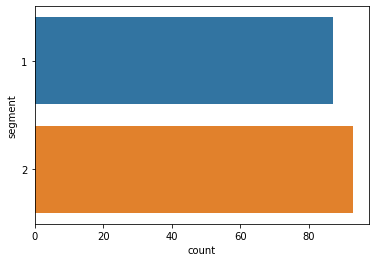

In [160]:
sns.countplot(y='segment', data = resu)
plt.show()


In [161]:
resu.shape

(180, 4)

In [163]:
resu.to_csv('Shashank1.csv',index=False)